In [1]:
import pandas as pd
import numpy as np

# Data Wrangling Imports
from datetime import datetime

# Data Analysis Imports
import statistics
import seaborn as sns
from scipy import linalg
from matplotlib import style
from matplotlib import ticker
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Data Visualization Imports
#import cufflinks as cf
#import chart_studio.plotly as py
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.gridspec import GridSpec

# Econometry Imports
import pandas_ta as ta

# Other Imports
import os
from itertools import product
import warnings
import talib
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.10f}".format

### 2- Depois de cadastrar uma conta na [Binance](https://www.binance.com/pt-BR) é necessário inserir os parâmetros key e secret da API

In [ ]:
from binance.client import Client
%run chaves02.ipynb
client = Client(key,secret)

In [ ]:
# Escolhe o par
TRADING_PAIR = 'BTCBRL'
# Data de Inicio da Captura dos Dados
STARTING_DATE = "5 Mar, 2021"
# Data Final da Captura dos Dados
END_DATE = "12 Mar, 2021"

In [ ]:
def process_message(msg):
    if msg['e'] == 'error':
        bm.stop_socket(conn_key)
        bm.close()
    else:
        pass

In [ ]:
time_res = client.get_server_time()
time_res

### 3- Obtenção de informações via API da Binance e construção do dataframe __data__

### [Binance Websockets API](https://python-binance.readthedocs.io/en/latest/websockets.html)

In [ ]:
# Importing Binance Websockets API
from binance.client import *
from binance.websockets import BinanceSocketManager
from twisted.internet import reactor

# Initialize Binance Socket Manager
bm = BinanceSocketManager(client, user_timeout=60)
list_messages = []
conn_key = bm.start_trade_socket(TRADING_PAIR, process_message)
bm.start


In [ ]:
candles = client.get_klines(symbol=TRADING_PAIR, interval=Client.KLINE_INTERVAL_1MINUTE)

In [ ]:
# Old Get klines from Binance Python API
#klines = client.get_historical_klines("ONEBNB", Client.KLINE_INTERVAL_1MINUTE, STARTING_DATE, END_DATE)

In [ ]:
indexes = ['Open Time', 'Open', 'High','Low', 'Close', 'Volume', 'Close Time', 'QAV', 'No. Trades', 'Taker BBAV', 'Taker BQAV', 'Ignore']
data = pd.DataFrame(columns=indexes,data=candles)

In [ ]:
len(data)

In [ ]:
data.to_csv("CryptoBot_202103006Mv001.csv", index = False)

In [2]:
data = pd.read_csv("CryptoBot_202103006Mv001.csv")

In [3]:
data.dtypes
data['Open Time'] = data['Open Time'].apply(lambda x: datetime.fromtimestamp(int(x)/1000))
data.set_index(['Open Time'], inplace=True)
# data['Open'] = data['Open'].astype(float)
# data['High'] = data['High'].astype(float)
# data['Low'] = data['Low'].astype(float)
data['Close'] = data['Close'].astype(float)
data['Volume'] = data['Volume'].astype(float)
# data['QAV'] = data['QAV'].astype(float)
# data['Taker BBAV'] = data['Taker BBAV'].astype(float)
# data['Taker BQAV'] = data['Taker BQAV'].astype(float)

#### Multiplicação pelo fator 10**10 para evitar os problemas com float

In [4]:
data = data*10**10
data

,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Ignore
Open Time,,,,,,,,,,,
2021-03-19 08:09:00,42560000.0000000000,42590000.0000000000,42560000.0000000000,42580000.0000000000,4430000000000.0000000000,2174191420432784384,18861070000.0000000000,60000000000,3500000000000.0000000000,14901130000.0000000000,0
2021-03-19 08:10:00,42580000.0000000000,42580000.0000000000,42580000.0000000000,42580000.0000000000,0.0000000000,2174791420432784384,0.0000000000,0,0.0000000000,0.0000000000,0
2021-03-19 08:11:00,42490000.0000000000,42620000.0000000000,42400000.0000000000,42400000.0000000000,25700000000000.0000000000,2175391420432784384,109069260000.0000000000,430000000000,1120000000000.0000000000,4772550000.0000000000,0
2021-03-19 08:12:00,42379999.9999999925,42390000.0000000000,42330000.0000000000,42390000.0000000000,11420000000000.0000000000,2175991420432784384,48363270000.0000000000,230000000000,0.0000000000,0.0000000000,0
2021-03-19 08:13:00,42400000.0000000000,42400000.0000000000,42390000.0000000000,42390000.0000000000,10960000000000.0000000000,2176591420432784384,46459720000.0000076294,30000000000,0.0000000000,0.0000000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19 16:24:00,42210000.0000000000,42210000.0000000000,42210000.0000000000,42210000.0000000000,150000000000.0000000000,2471191420432784384,633150000.0000000000,10000000000,0.0000000000,0.0000000000,0
2021-03-19 16:25:00,42210000.0000000000,42210000.0000000000,42210000.0000000000,42210000.0000000000,540000000000.0000000000,2471791420432784384,2279340000.0000000000,20000000000,0.0000000000,0.0000000000,0
2021-03-19 16:26:00,42200000.0000000000,42360000.0000000000,42200000.0000000000,42230000.0000000000,22680000000000.0000000000,2472391420432784384,96007820000.0000000000,180000000000,4180000000000.0000000000,17673000000.0000000000,0


### 4- Gráficos da informação obtida pela API da Binance e armazenada em __data__

#### [Introduction to Econometrics - G. S. Madalla](https://www.amazon.com.br/Introduction-Econometrics-G-S-Maddala/dp/0471497282) 

### Análise das informações obitidas pela API da Binance e armazenadas no dataframe __data__

#### 4.1. Gráficos com legenda automática do dataframe __data__

#### 4.1.1. Gráficos 'Open', 'High', 'Low', 'Close'

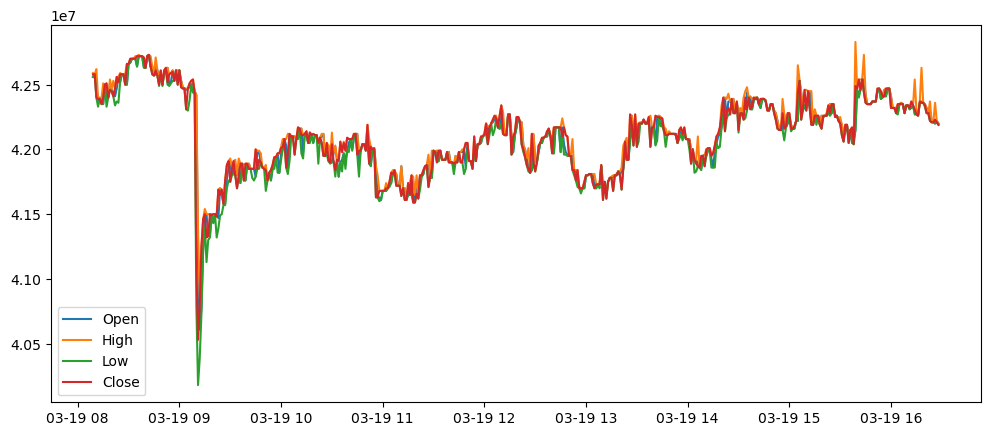

In [5]:
from matplotlib.pyplot import legend
from matplotlib import pylab
data_0 = data[['Open', 'High', 'Low', 'Close']]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)
plt.legend(line, data_0.columns)

In [6]:
close = np.array(data['Close'])
high = np.array(data['High'])
low = np.array(data['Low'])

##### 5.1.1. BBANDS - Bollinger Bands
Learn more about the Bollinger Bands at tadoc.org.

In [7]:
upperband, middleband, lowerband = talib.BBANDS(np.array(data['Close']), timeperiod=21, nbdevup=1.7, nbdevdn=1.7, matype=0)

In [8]:
middleband[30:40]

array([42610476.19047619, 42618571.42857143, 42631428.57142857,
       42646666.66666666, 42654761.9047619 , 42655714.28571428,
       42658095.23809524, 42659523.80952381, 42659047.61904762,
       42655238.0952381 ])

In [9]:
upperband[30:40]

array([42787959.55496658, 42786640.73724318, 42790408.82519485,
       42785206.44377755, 42776066.28570083, 42775068.95640584,
       42770813.97983316, 42769880.64160253, 42770450.5668543 ,
       42777671.71369644])

In [10]:
upperband[0]

nan

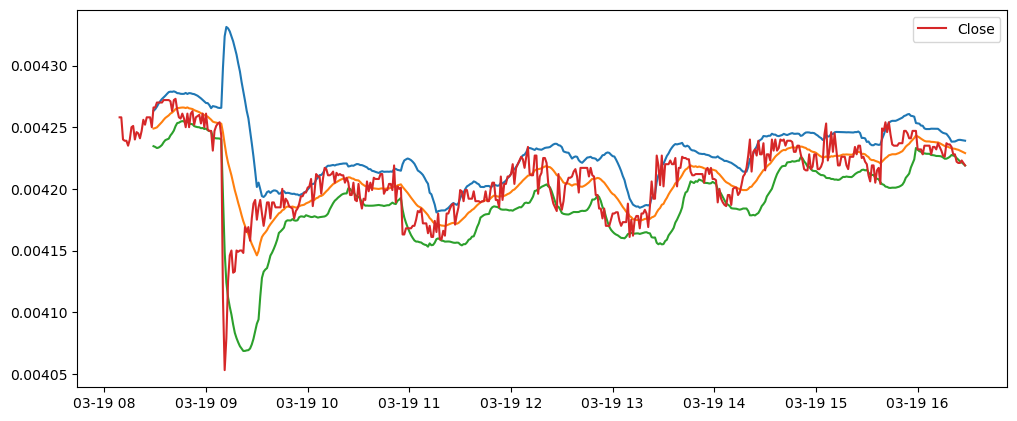

In [12]:
#Bordas de Boillinger
data_Boillinger = pd.DataFrame({"Upperband": upperband/(10**10), "Middleband":middleband/(10**10), "Lowerband":lowerband/(10**10)})

data_0 = data_Boillinger[["Upperband", "Middleband", "Lowerband"]]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)


#Preço
data_p = pd.DataFrame()
data_p['Close'] = data['Close']/(10**10)

line_p = plt.plot(data_p.index, data_p)


plt.legend(line, data_0.columns)
plt.legend(line_p, data_p.columns)
plt.show()

In [13]:
df_BBANDS_score = pd.DataFrame()
for i in range(len(data)):
    df_BBANDS_score = df_BBANDS_score.append({"Close": data['Close'][i], "Upperband":upperband[i], "Middleband":middleband[i], "Lowerband":lowerband[i]}, ignore_index = True)

In [14]:
range(len(data))

range(0, 500)

In [15]:
data_BBANDS = data_p.dropna().reset_index(drop = True)

In [16]:
data_BBANDS

,Close
0,0.0042580000
1,0.0042580000
2,0.0042400000
3,0.0042390000
4,0.0042390000
...,...
495,0.0042210000
496,0.0042210000
497,0.0042230000
498,0.0042210000


In [17]:
df_BBANDS_score["Close"] = data_BBANDS

In [18]:
df_BBANDS_score

,Close,Lowerband,Middleband,Upperband
0,0.0042580000,NaN,NaN,NaN
1,0.0042580000,NaN,NaN,NaN
2,0.0042400000,NaN,NaN,NaN
3,0.0042390000,NaN,NaN,NaN
4,0.0042390000,NaN,NaN,NaN
...,...,...,...,...
495,0.0042210000,42236872.0891308784,42316666.6666666642,42396461.2442024499
496,0.0042210000,42222526.4665897414,42310000.0000000000,42397473.5334102586
497,0.0042230000,42213633.5045573935,42304285.7142857164,42394937.9240140393
498,0.0042210000,42202618.0570499748,42297619.0476190448,42392620.0381881148


In [19]:
df_BBANDS_score = df_BBANDS_score.dropna().reset_index(drop = True)

In [20]:
df_BBANDS_score["Close"][0]

0.004266

## Loop com o de compra com Bordar de Boillinger

In [21]:
# Todos os valores estão em reais
M_0 = 100.0

Montante_reais = M_0/2 # Fração do montante na primeira moeda do par
Montante_crypto = M_0/2/df_BBANDS_score["Close"][0] # Fração da criptomoeda correspondente ao complemento do investimento inicial.
                                                    # É o valor em reais dividido pelo valor de fechamento da criptomoeda no momento da compra.
Montante_total = M_0
df_BBANDS_score["Upper Touch"] = 0.0
df_BBANDS_score["Down Touch"] = 0.0
df_BBANDS_score["Ganho [%]"] = 0.0
df_BBANDS_score["Montante_total"] = Montante_total
change = ""
last_change = "" # Toque inicial na linha de Boilliger é vazio
band_count = 0
for i in range(len(df_BBANDS_score)):
    
    last_change = change
    Montante_total = Montante_reais + Montante_crypto*df_BBANDS_score['Close'][i]
    df_BBANDS_score["Montante_total"][i] = Montante_total
    df_BBANDS_score["Ganho [%]"][i] = (Montante_total - M_0)/M_0*100
    if (df_BBANDS_score['Close'][i] - df_BBANDS_score['Upperband'][i])>0.0:
        df_BBANDS_score["Upper Touch"][i] = 1
        change = "UP"
        
    if ((df_BBANDS_score['Close'][i] - df_BBANDS_score['Lowerband'][i])<0.0):
        df_BBANDS_score["Down Touch"][i] = 1
        change = "DOWN"
    
    if (last_change != change):
        if (last_change == "UP"):
            venda_cripto = 0.03*Montante_crypto*df_BBANDS_score['Close'][i] # Venda das criptos em reais
            Montante_crypto -= 0.03*Montante_crypto # Diminui o montante de crypto moedas
            Montante_reais += venda_cripto # Aumenta o montante de reais
        if (last_change == "DOWN"):
            compra_cripto = 0.03*Montante_reais
            Montante_reais -= compra_cripto
            Montante_crypto += compra_cripto/df_BBANDS_score['Close'][i]
        #Conta o número de mudanças entre compra e venda de acordo com os toques alternados nas Bordas de Boillinger
        band_count += 1 



In [22]:
band_count

1

In [23]:
"" != "UP"

True

In [24]:
Montante_total

99.44913267698078

In [25]:
df_BBANDS_score

,Close,Lowerband,Middleband,Upperband,Upper Touch,Down Touch,Ganho [%],Montante_total
0,0.0042660000,42345860.2705142498,42489047.6190476194,42632234.9675809890,0.0000000000,1.0000000000,0.0000000000,100.0000000000
1,0.0042660000,42340069.3081017360,42492857.1428571418,42645644.9776125476,0.0000000000,1.0000000000,0.0000000000,100.0000000000
2,0.0042700000,42330912.0313694626,42498571.4285714254,42666230.8257733881,0.0000000000,1.0000000000,0.0468823254,100.0468823254
3,0.0042700000,42334625.8095752895,42512857.1428571418,42691088.4761389941,0.0000000000,1.0000000000,0.0468823254,100.0468823254
4,0.0042700000,42343556.0469668061,42527619.0476190448,42711682.0482712835,0.0000000000,1.0000000000,0.0468823254,100.0468823254
...,...,...,...,...,...,...,...,...
475,0.0042210000,42236872.0891308784,42316666.6666666642,42396461.2442024499,0.0000000000,1.0000000000,-0.5274261603,99.4725738397
476,0.0042210000,42222526.4665897414,42310000.0000000000,42397473.5334102586,0.0000000000,1.0000000000,-0.5274261603,99.4725738397
477,0.0042230000,42213633.5045573935,42304285.7142857164,42394937.9240140393,0.0000000000,1.0000000000,-0.5039849977,99.4960150023
478,0.0042210000,42202618.0570499748,42297619.0476190448,42392620.0381881148,0.0000000000,1.0000000000,-0.5274261603,99.4725738397


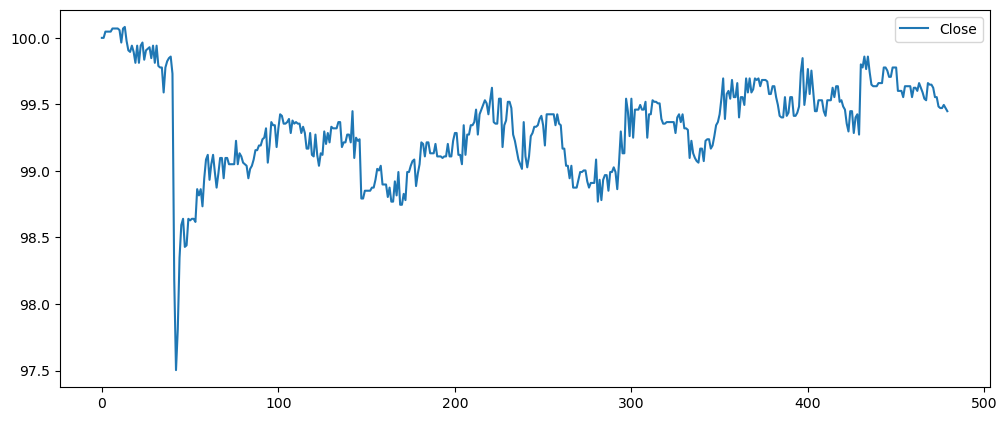

In [26]:
data_0 = df_BBANDS_score[["Montante_total"]]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(df_BBANDS_score.index, data_0)


#Preço
# data_p = pd.DataFrame()
# data_p['Close'] = data['Close']

# line_p = plt.plot(data_p.index, data_p)


plt.legend(line, df_BBANDS_score.columns)
# plt.legend(line_p, data_p.columns)
plt.show()

In [27]:
df_BBANDS_score[df_BBANDS_score["Ganho [%]"]<0.0].sum()

Close                      1.9647750000
Lowerband        19555403857.7516059875
Middleband       19651959047.6190490723
Upperband        19748514237.4864883423
Upper Touch                0.0000000000
Down Touch               467.0000000000
Ganho [%]               -321.6947960619
Montante_total         46378.3052039381
dtype: float64

In [28]:
df_BBANDS_score[df_BBANDS_score["Ganho [%]"]>0.0].sum()

Close                    0.0469840000
Lowerband        466359795.7543522716
Middleband       468286666.6666666865
Upperband        470213537.5789809823
Upper Touch              0.0000000000
Down Touch              11.0000000000
Ganho [%]                0.6797937178
Montante_total        1100.6797937178
dtype: float64

In [29]:
df_BBANDS_score.tail()

,Close,Lowerband,Middleband,Upperband,Upper Touch,Down Touch,Ganho [%],Montante_total
475,0.0042210000,42236872.0891308784,42316666.6666666642,42396461.2442024499,0.0000000000,1.0000000000,-0.5274261603,99.4725738397
476,0.0042210000,42222526.4665897414,42310000.0000000000,42397473.5334102586,0.0000000000,1.0000000000,-0.5274261603,99.4725738397
477,0.0042230000,42213633.5045573935,42304285.7142857164,42394937.9240140393,0.0000000000,1.0000000000,-0.5039849977,99.4960150023
478,0.0042210000,42202618.0570499748,42297619.0476190448,42392620.0381881148,0.0000000000,1.0000000000,-0.5274261603,99.4725738397
479,0.0042190000,42189632.1053034514,42290000.0000000000,42390367.8946965486,0.0000000000,1.0000000000,-0.5508673230,99.4491326770
